<a id='intro'></a>
# Introduction
**The aim of the project** is to employ several supervised algorithms to accurately model individuals' income, whether he makes more than 50,000 or not, using data collected from the 1994 U.S. Census.

The data_ss_ss_ss_ssset that will be used is the **census income dataset**, which was extracted from the machine learning repository (UCI), which contains about 32561 rows and 15 features.

## Dataset Description
<table>
    <tr>
        <th><center> Name </center></th>
        <th><center> Type </center></th>
        <th><center> Values </center></th>
        <th><center> Description </center></th>
    </tr>
    <tr>
        <td><center> age </center></td>
        <td><center> Continuous </center></td>
        <td><center> From 17 to 90 </center></td>
        <td><center> The age of an individual </center></td>
    </tr>
    <tr>
        <td><center> workclass </center></td>
        <td><center> Nominal </center></td>
        <td><center> Private, Federal-Government, etc </center></td>
        <td><center> A general term to represent the employment status of an individual</center></td>
    </tr>
    <tr>
        <td><center> fnlwgt </center></td>
        <td><center> Continuous </center></td>
        <td><center> Integer greater than 0 </center></td>
        <td><center> Final weight: is the number of people the census believes the entry represents </center></td>
    </tr>
    <tr>
        <td><center> education </center></td>
        <td><center> Ordinal  </center></td>
        <td><center> Some-college, Prof-school, etc </center></td>
        <td><center> The highest level of education achieved by an individual </center></td>
    </tr>
    <tr>
        <td><center> education-num </center></td>
        <td><center> Discrete  </center></td>
        <td><center> From 1 to 16 </center></td>
        <td><center> The highest level of education achieved in numerical form </center></td>
    </tr>
    <tr>
        <td><center> marital-status </center></td>
        <td><center> Nominal  </center></td>
        <td><center> Married, Divorced, etc. </center></td>
        <td><center> Marital status of an individual </center></td>
    </tr>
    <tr>
        <td><center> occupation </center></td>
        <td><center> Nominal </center></td>
        <td><center> Transport-Moving, Craft-Repair, etc </center></td>
        <td><center> The general type of occupation of an individual </center></td>
    </tr>
    <tr>
        <td><center> relationship </center></td>
        <td><center> Nominal  </center></td>
        <td><center> Unmarried, not in the family, etc </center></td>
        <td><center> Represents what this individual is relative to others  </center></td>
    </tr>
    <tr>
        <td><center> race </center></td>
        <td><center> Nominal  </center></td>
        <td><center> White, Black, Hispanic, etc. </center></td>
        <td><center> Descriptions of an individual’s race </center></td>
    </tr>
    <tr>
        <td><center> sex </center></td>
        <td><center> Nominal  </center></td>
        <td><center> Male, Female </center></td>
        <td><center> The biological sex of the individual </center></td>
    </tr>
    <tr>
        <td><center> capital-gain </center></td>
        <td><center> Continous </center></td>
        <td><center> Integer greater than or equal to 0 </center></td>
        <td><center> Capital gains for an individual  </center></td>
    </tr>
    <tr>
        <td><center> capital-loss </center></td>
        <td><center> Continous </center></td>
        <td><center> Integer greater than or equal to 0 </center></td>
        <td><center> Capital loss for an individual  </center></td>
    </tr>
    <tr>
        <td><center> hours-per-week </center></td>
        <td><center> Continous </center></td>
        <td><center> From 1 to 99 </center></td>
        <td><center> The hours an individual has reported to work per week </center></td>
    </tr>
    <tr>
        <td><center> native-country </center></td>
        <td><center> Nominal  </center></td>
        <td><center> United-States, Cambodia, England, Puerto-Rico, Canada and more </center></td>
        <td><center> Country of origin for an individual  </center></td>
    </tr>
    <tr>
        <td><center> income </center></td>
        <td><center> Discrete  </center></td>
        <td><center> (≤50k USD, >50k USD) </center></td>
        <td><center> The label whether or not an individual  </center></td>
    </tr>

</table>

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = fetch_ucirepo(id=20) 


In [3]:
# metadata 
print(df.metadata) 
  
# variable information 
print(df.variables) 


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [4]:
X_str = df.data.features 
y_str = df.data.targets 
data = pd.concat([X_str, y_str], axis=1) 

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [5]:
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [6]:
# Display column names
print("\nColumn names in the DataFrame:")
print(data.columns)


Column names in the DataFrame:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [7]:
# Display the structure of the fetched data_ss
print("Features (X) Shape: ", X_str.shape)
print("Target (y) Shape: ", y_str.shape)

# Display the first few rows of features and target
print("\nFirst 5 rows of Features (X):")
print(X_str.head())

print("\nFirst 5 rows of Target (y):")
print(y_str.head())


Features (X) Shape:  (48842, 14)
Target (y) Shape:  (48842, 1)

First 5 rows of Features (X):
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174          

## Pre-processing

In [8]:
print(data['income'].value_counts())    # Check the distribution of the target variable

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


- We found that there is an error with income column, s.t., there exists more than the two classes mentioned (<=50K, >50k)

In [9]:
# Remove trailing periods in the 'income' column to standardize the labels
data['income'] = data['income'].str.strip().replace({'<=50K.': '<=50K', '>50K.': '>50K'})


In [10]:
# Total number of records
n_records = data.shape[0]

# Total number of features
n_features = data.shape[1]

# Make sure there are no leading or trailing spaces in the income column
data['income'] = data['income'].str.strip()

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100  

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))


Total number of records: 48842
Total number of features: 15
Individuals making more than $50k: 11687
Individuals making at most $50k: 37155
Percentage of individuals making more than $50k: 23.93%


In [11]:
print(data["workclass"].value_counts())
print("\n")
print(data["occupation"].value_counts())
print("\n")
print(data["native-country"].value_counts())
print("\n")

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     

- We found "?" symbol in the dataset, so we changed it to "Unknown", for better interpretation and cleaner representation.

In [12]:
# changing "?" to Unknown
change_columns = ['workclass', 'occupation', 'native-country']
for column in change_columns:
        data[column] = data[column].replace({'?': 'Unknown'})

In [13]:
print(data["education"].value_counts())
print("\n")
print(data["education-num"].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64


- We found that "education" is a duplicate feature of "education-num" so we drop it "education" column.

In [14]:
# drop education column
data.drop(columns=['education'], inplace=True)
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [15]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [16]:
# Drop rows with missing values (if necessary)
data.dropna(inplace=True)


In [17]:
# Basic statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
data.describe()


Descriptive Statistics for Numerical Features:


age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

#### Label Encoding

In [18]:
# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical features to encode
categorical_features = [
    'workclass', 'marital-status', 
    'occupation', 'relationship', 'race', 
    'sex', 'native-country', 'income'
]

# Apply Label Encoding to each categorical column
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

# Display the first few rows of the encoded dataset
print("Dataset after Label Encoding:")
print(data.head())


Dataset after Label Encoding:
   age  workclass  fnlwgt  education-num  marital-status  occupation  \
0   39          6   77516             13               4           0   
1   50          5   83311             13               2           3   
2   38          3  215646              9               0           5   
3   53          3  234721              7               2           5   
4   28          3  338409             13               2           9   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   native-country  income  
0              38       0  
1              38       0  
2       

In [19]:
data.describe()

age     workclass        fnlwgt  education-num  \
count  47621.000000  47621.000000  4.762100e+04   47621.000000   
mean      38.640684      3.255770  1.897271e+05      10.090821   
std       13.558961      1.350321  1.055695e+05       2.568320   
min       17.000000      0.000000  1.228500e+04       1.000000   
25%       28.000000      3.000000  1.175840e+05       9.000000   
50%       37.000000      3.000000  1.782820e+05      10.000000   
75%       48.000000      3.000000  2.377200e+05      12.000000   
max       90.000000      8.000000  1.490400e+06      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    47621.000000  47621.000000  47621.000000  47621.000000  47621.000000   
mean         2.606602      6.284916      1.432141      3.671489      0.670650   
std          1.505946      4.238224      1.601278      0.842198      0.469982   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      6.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  \
count  47621.000000  47621.000000    47621.000000    47621.000000   
mean    1091.137649     87.853489       40.600050       36.438273   
std     7487.228336    404.010612       12.260345        6.052708   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       38.000000   
50%        0.000000      0.000000       40.000000       38.000000   
75%        0.000000      0.000000       45.000000       38.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             income  
count  47621.000000  
mean       0.242351  
std        0.428510  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

#### Standard Scaling

In [20]:
# Define the numerical features with continuous values
numerical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

data_ss = data.copy()
# Standardizing the numerical features
scaler = StandardScaler()
data_ss[numerical_features] = scaler.fit_transform(data_ss[numerical_features])


In [21]:
data_ss.describe()

age     workclass        fnlwgt  education-num  \
count  4.762100e+04  47621.000000  4.762100e+04   47621.000000   
mean   1.324966e-16      3.255770 -4.088295e-17      10.090821   
std    1.000010e+00      1.350321  1.000010e+00       2.568320   
min   -1.596060e+00      0.000000 -1.680827e+00       1.000000   
25%   -7.847796e-01      3.000000 -6.833784e-01       9.000000   
50%   -1.210049e-01      3.000000 -1.084145e-01      10.000000   
75%    6.902752e-01      3.000000  4.546141e-01      12.000000   
max    3.787890e+00      8.000000  1.232067e+01      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    47621.000000  47621.000000  47621.000000  47621.000000  47621.000000   
mean         2.606602      6.284916      1.432141      3.671489      0.670650   
std          1.505946      4.238224      1.601278      0.842198      0.469982   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      6.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  \
count  4.762100e+04  4.762100e+04    4.762100e+04    47621.000000   
mean  -1.536841e-17  1.581603e-17   -7.400710e-17       36.438273   
std    1.000010e+00  1.000010e+00    1.000010e+00        6.052708   
min   -1.457347e-01 -2.174557e-01   -3.229963e+00        0.000000   
25%   -1.457347e-01 -2.174557e-01   -4.894289e-02       38.000000   
50%   -1.457347e-01 -2.174557e-01   -4.894289e-02       38.000000   
75%   -1.457347e-01 -2.174557e-01    3.588803e-01       38.000000   
max    1.321035e+01  1.056455e+01    4.763370e+00       41.000000   

             income  
count  47621.000000  
mean       0.242351  
std        0.428510  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## EDA

##### No. of indiviudals with income <=50K & >50K denoted by 0 and 1 respectively

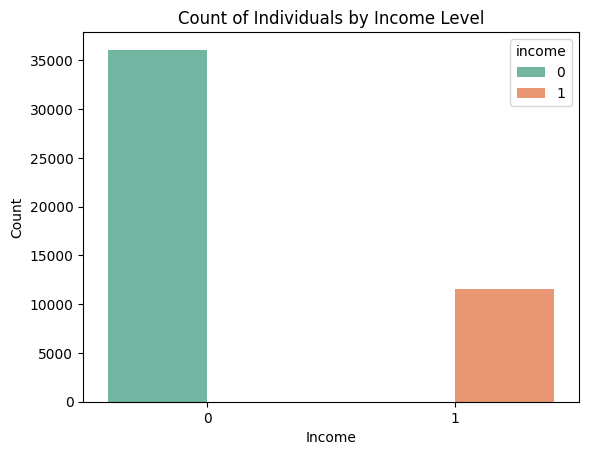

In [22]:
# Corrected countplot
sns.countplot(x='income', data=data, hue='income', palette='Set2')
plt.title('Count of Individuals by Income Level')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


#### Correlation Heatmap

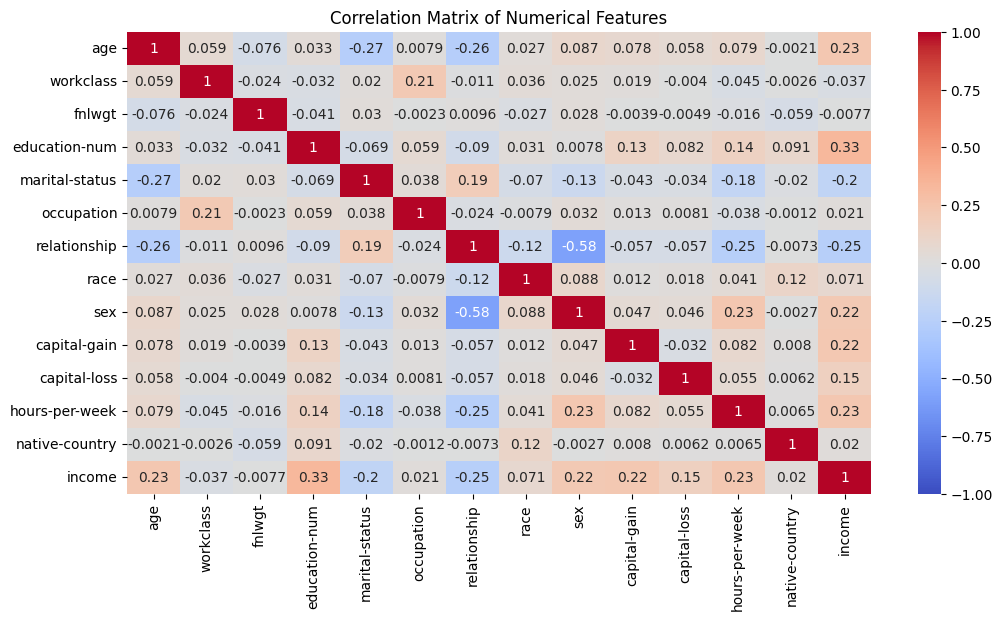

In [23]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

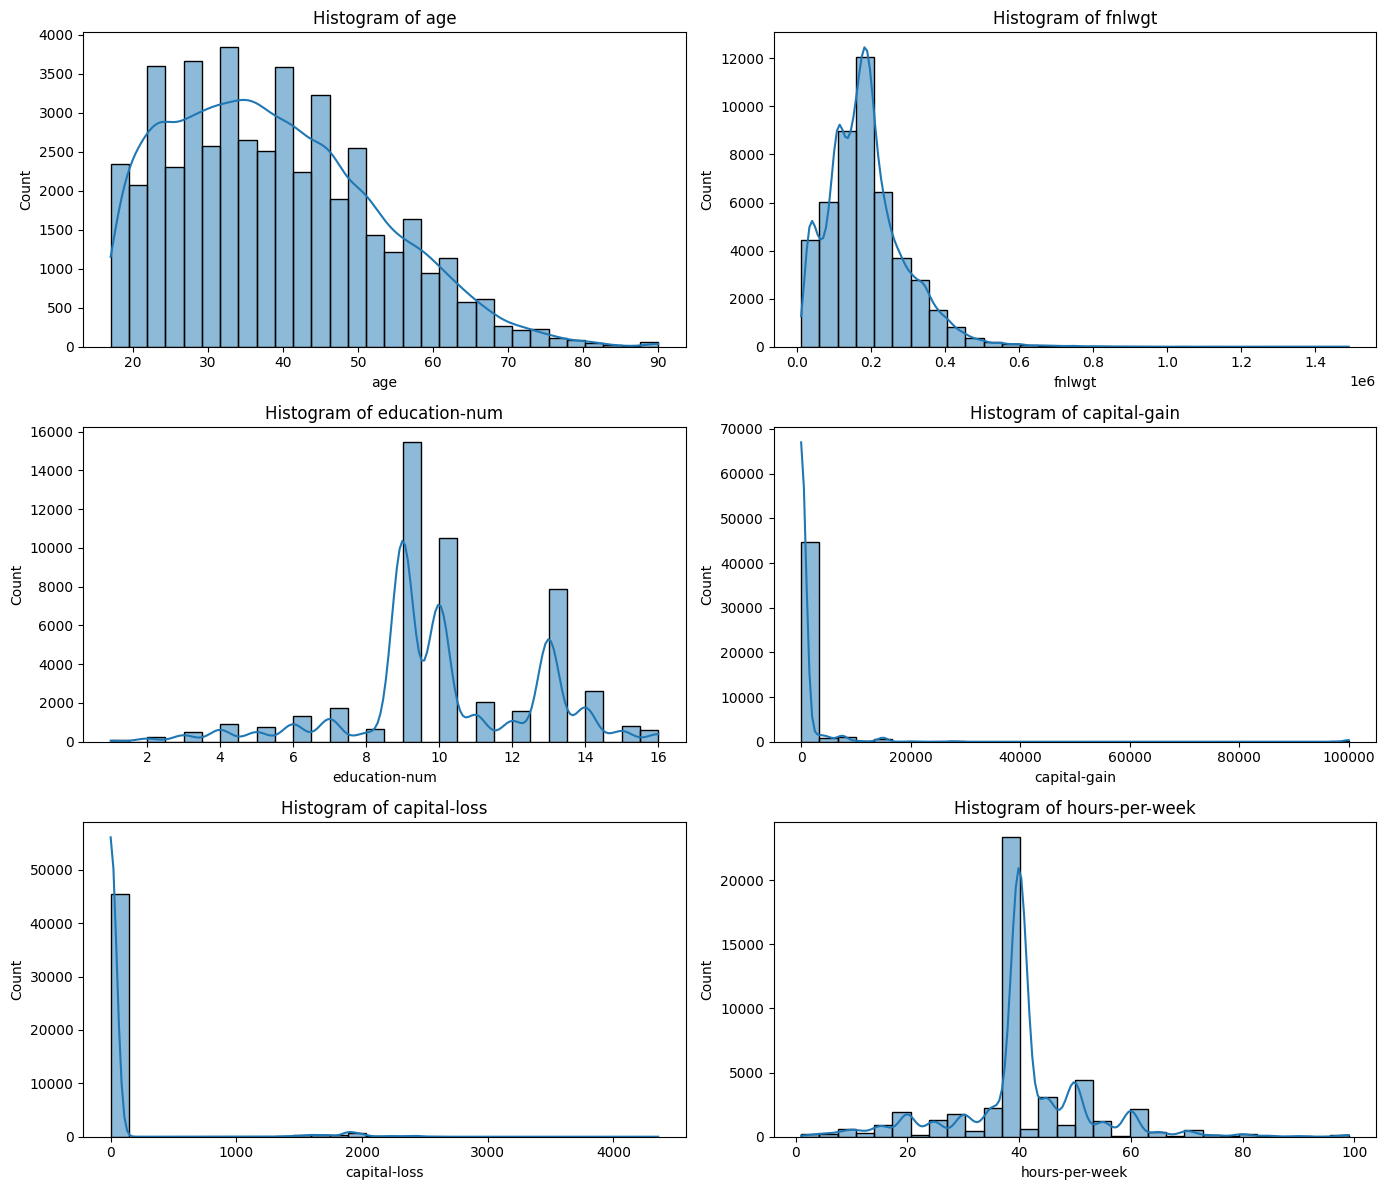

In [24]:
# Select only numerical features from the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Define the number of subplots based on the number of numerical features
num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(14, 4 * ((num_features + 1) // 2)))

# Flatten the axes array for easy iteration if it exists (depends on the number of features)
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Text(95.72222222222221, 0.5, 'Education Class')

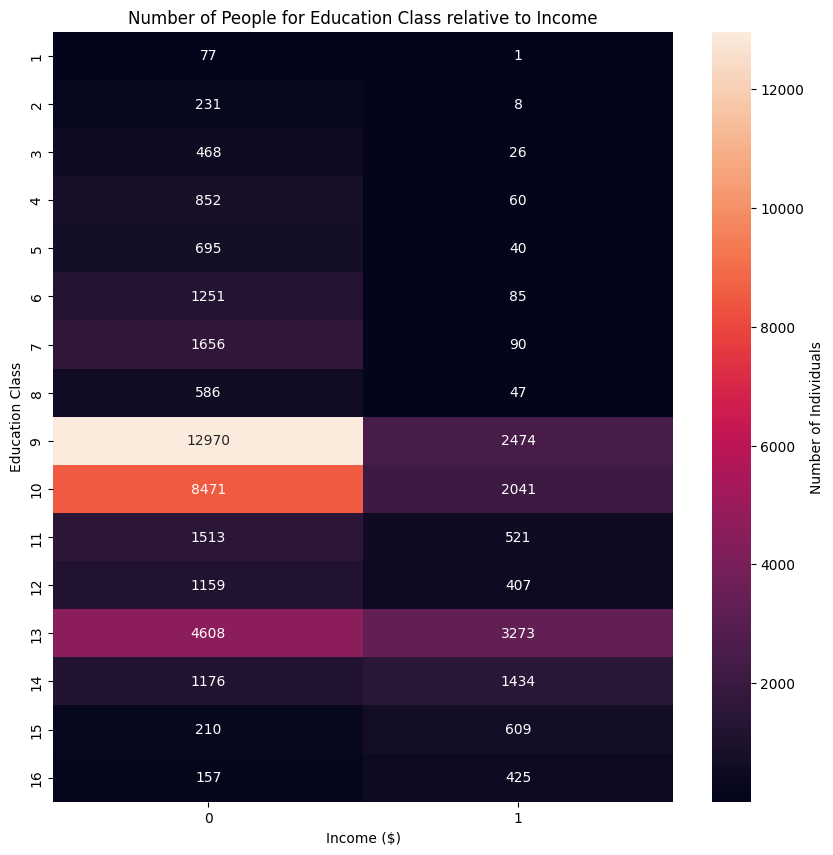

In [25]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = data.groupby(['education-num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education-num', columns = 'income', values = 'count').fillna(0)

sns.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class')

- In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

Text(0, 0.5, 'Average of Age')

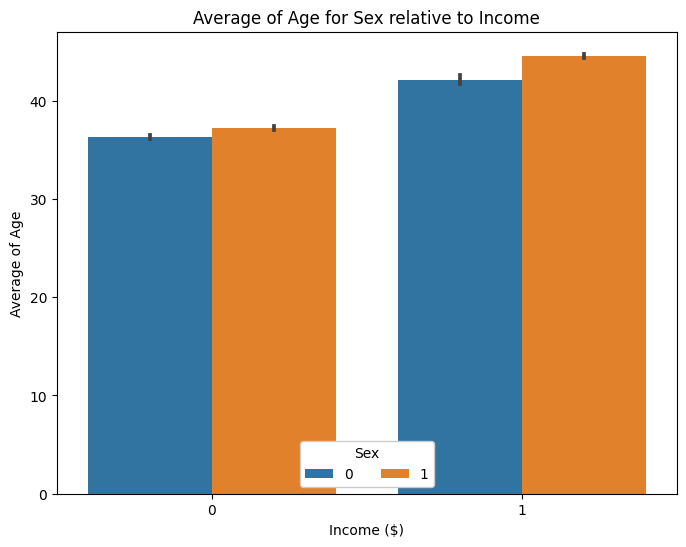

In [26]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = data, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age')

- The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

Text(0, 0.5, 'Average of Hours per Week')

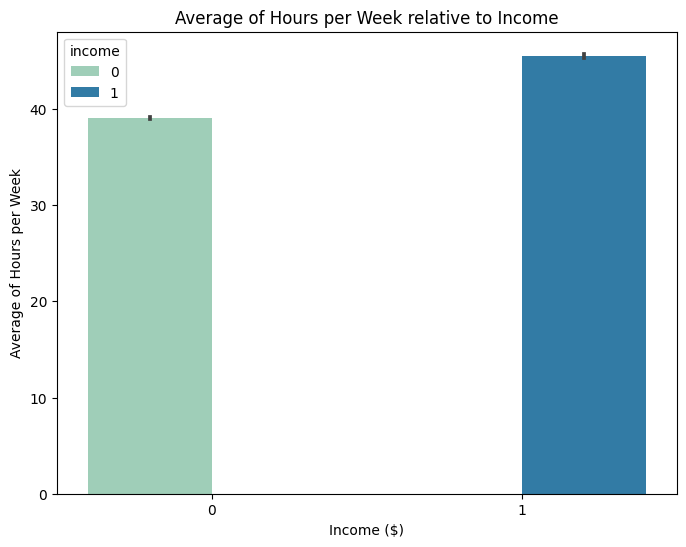

In [27]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(data=data, x='income', hue="income", y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week')

- We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

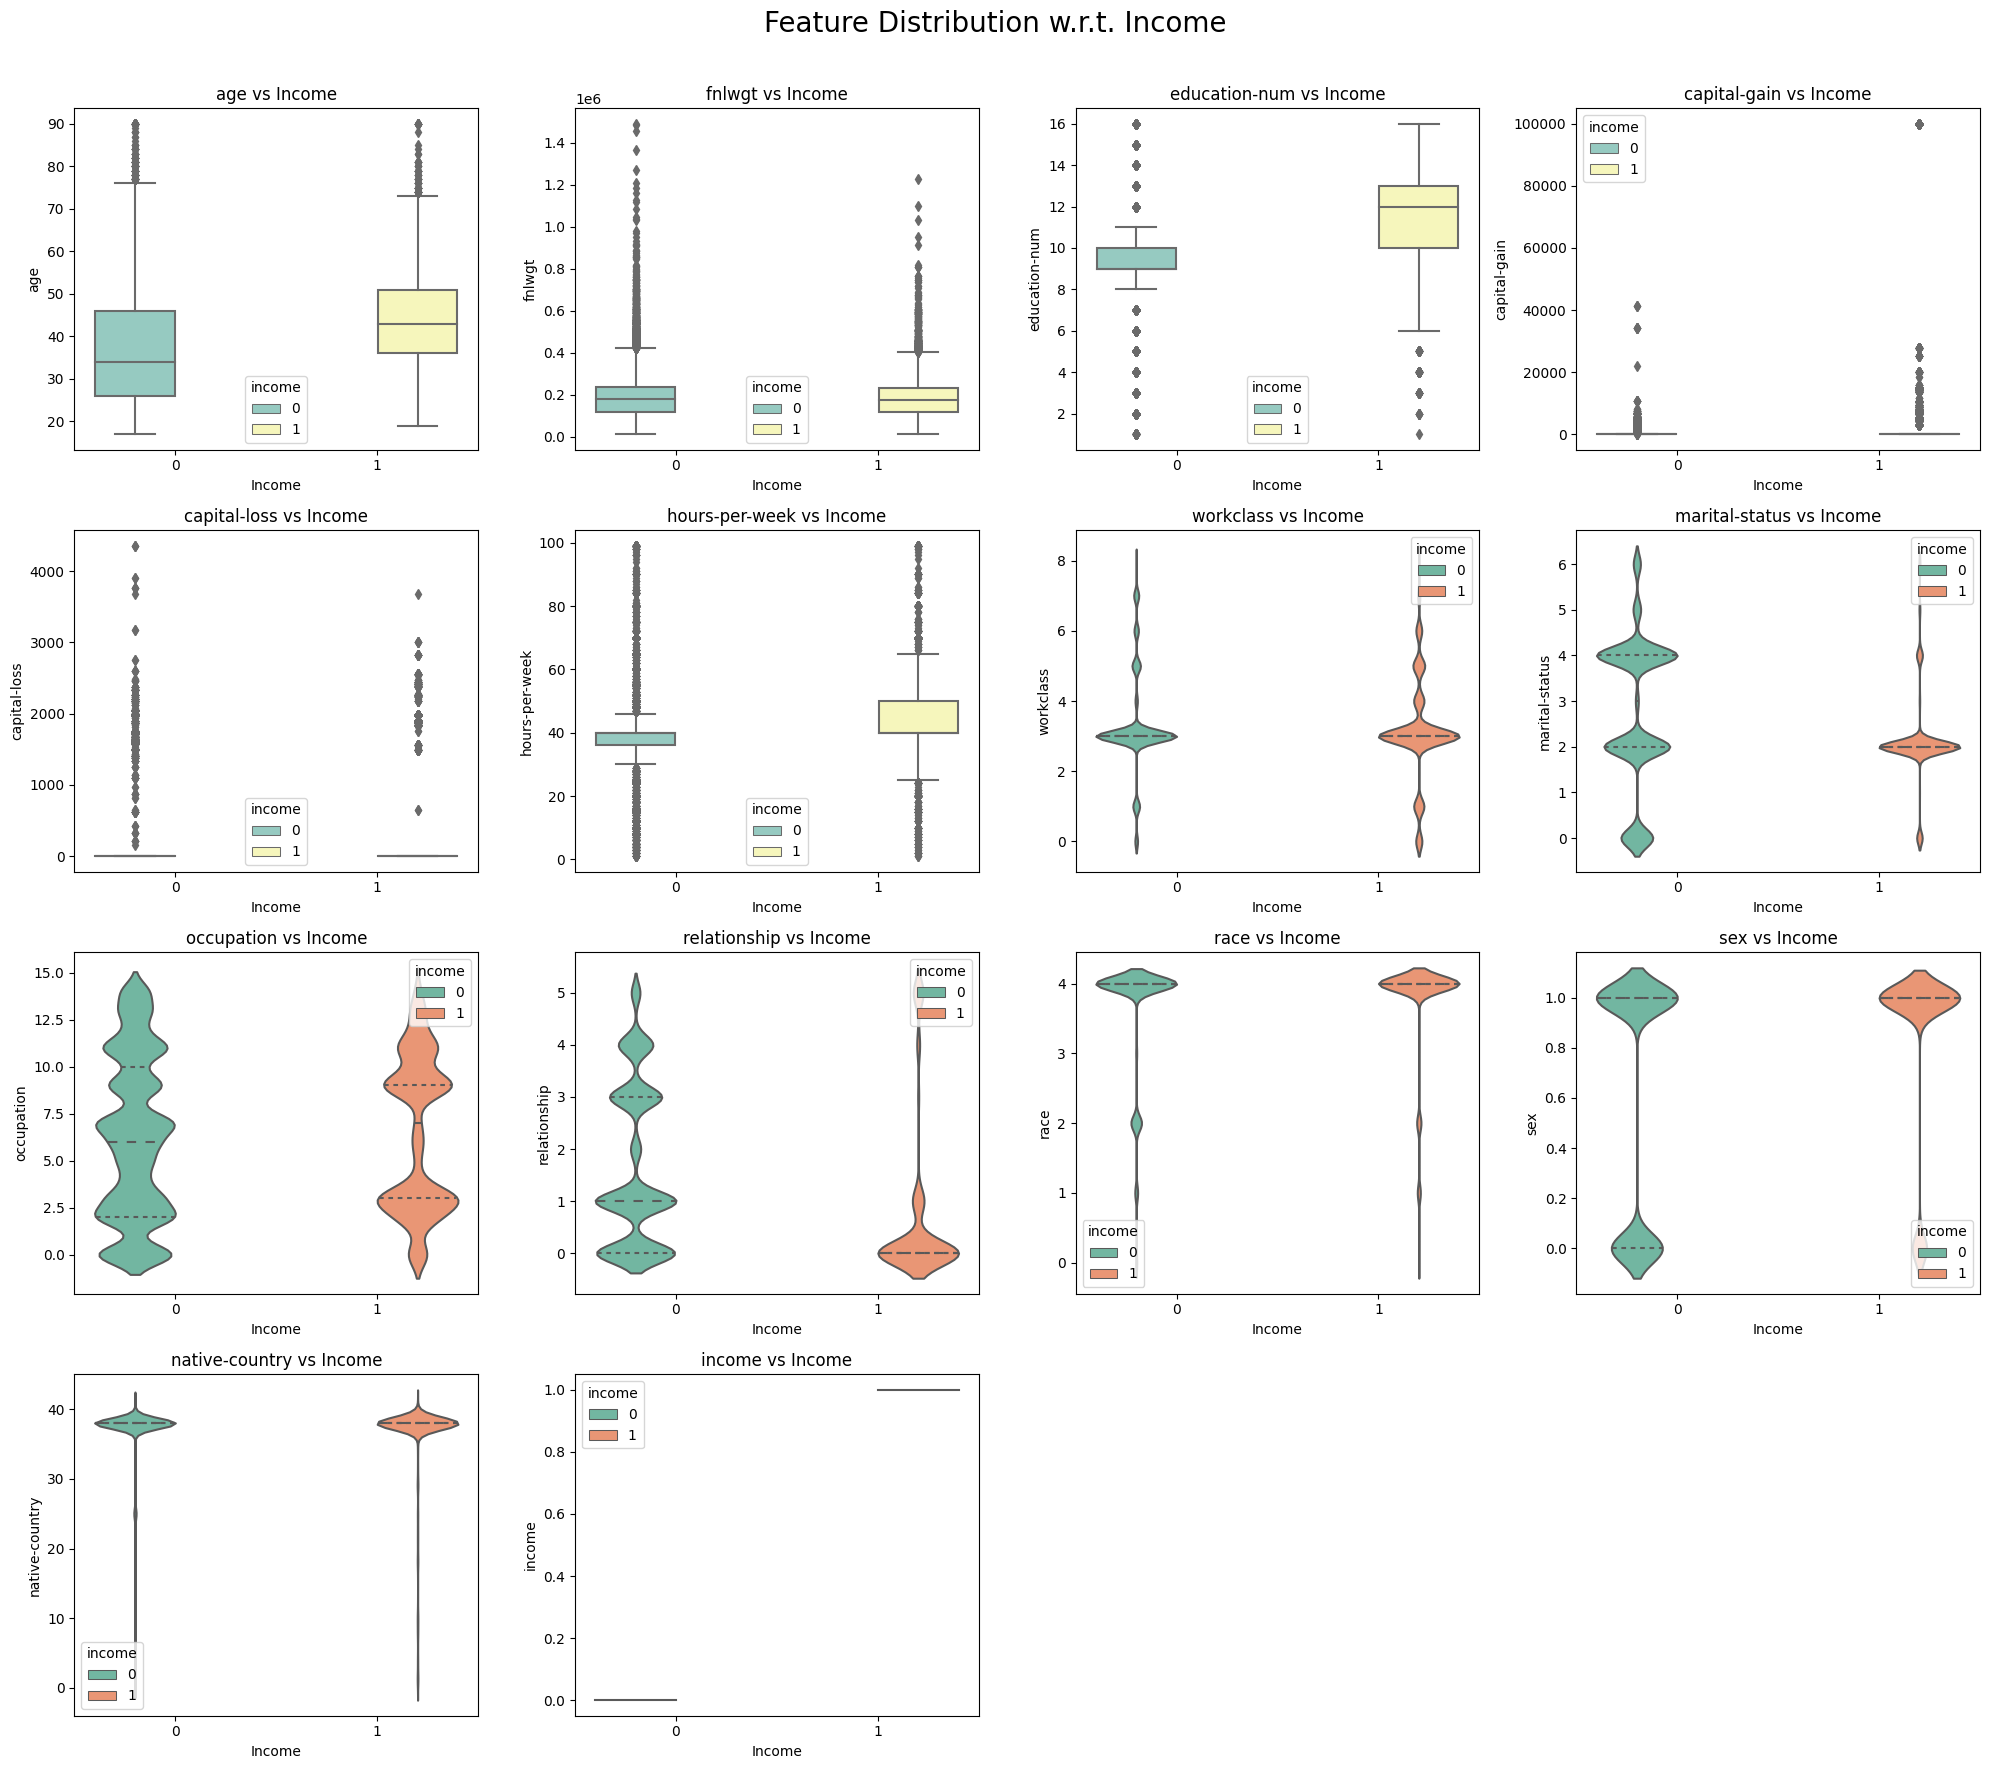

In [28]:
# Set figure size
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
fig.suptitle('Feature Distribution w.r.t. Income', fontsize=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Numeric features with respect to income (Boxplots)
for idx, feature in enumerate(numerical_features):
    row, col = divmod(idx, 4)
    sns.boxplot(x='income', hue="income", y=feature, data=data, ax=axes[row][col], palette='Set3')
    axes[row][col].set_title(f'{feature} vs Income')
    axes[row][col].set_xlabel('Income')
    axes[row][col].set_ylabel(feature)

# Categorical features with respect to income (Violin plots)
for idx, feature in enumerate(categorical_features):
    row, col = divmod(idx + len(numerical_features), 4)
    sns.violinplot(x='income', hue="income", y=feature, data=data, ax=axes[row][col], palette='Set2', inner='quartile')
    axes[row][col].set_title(f'{feature} vs Income')
    axes[row][col].set_xlabel('Income')
    axes[row][col].set_ylabel(feature)

# Hide any unused subplots
for i in range(len(numerical_features) + len(categorical_features), 16):
    fig.delaxes(axes[i // 4][i % 4])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Descriptive Analysis
1. Age vs Income:
Observation: Individuals with higher income (>50K) tend to be older compared to those with lower income (<=50K), as the median age for higher income is clearly greater.
2. Fnlwgt vs Income:
Observation: The distribution of fnlwgt (final weight) appears to have no clear relationship with income. Both classes have a broad range of weights.
3. Education-num vs Income:
Observation: Higher education levels (as represented by education-num) are associated with higher income, indicated by a higher median education level for individuals earning >50K.
4. Capital-gain vs Income:
Observation: Capital gain shows a strong correlation with higher income. Those with high income (>50K) tend to have significantly higher capital gains compared to the lower-income group, where most values are near zero.
5. Capital-loss vs Income:
Observation: Similar to capital gains, capital loss is also higher for individuals earning >50K, but the distribution has many zero values for both income groups.
6. Hours-per-week vs Income:
Observation: Individuals with higher income tend to work more hours per week, with the median hours worked for those earning >50K being higher than for those earning <=50K.
7. Workclass vs Income:
Observation: The work class distribution shows some variation between income groups, but the difference in distribution is not very significant.
8. Marital-status vs Income:
Observation: Marital status seems to have a noticeable impact on income, with a distinct difference in the distribution between the two income groups, suggesting that certain marital statuses may correlate with higher earnings.
9. Occupation vs Income:
Observation: The occupation feature shows a difference in distribution between income groups, suggesting certain occupations are more common in higher-income individuals.
10. Relationship vs Income:
Observation: Relationship status has a strong influence on income. Certain relationship categories (such as married individuals) seem to be more prevalent in the higher income group.
11. Race vs Income:
Observation: The distribution of race across income groups does not show a significant disparity, suggesting race might not be a strong determinant of income in this dataset.
12. Sex vs Income:
Observation: There is a noticeable difference between genders, with more men represented in the higher income group (>50K).
13. Native-country vs Income:
Observation: The distribution for native country shows some differences, but there isn’t a clear, strong pattern distinguishing income groups.
##### General Observations:
- Features like age, education-num, capital-gain, and hours-per-week have clearer, more distinguishable patterns between income groups.
- Categorical features such as occupation, marital-status, and relationship also show distinct patterns across income groups.

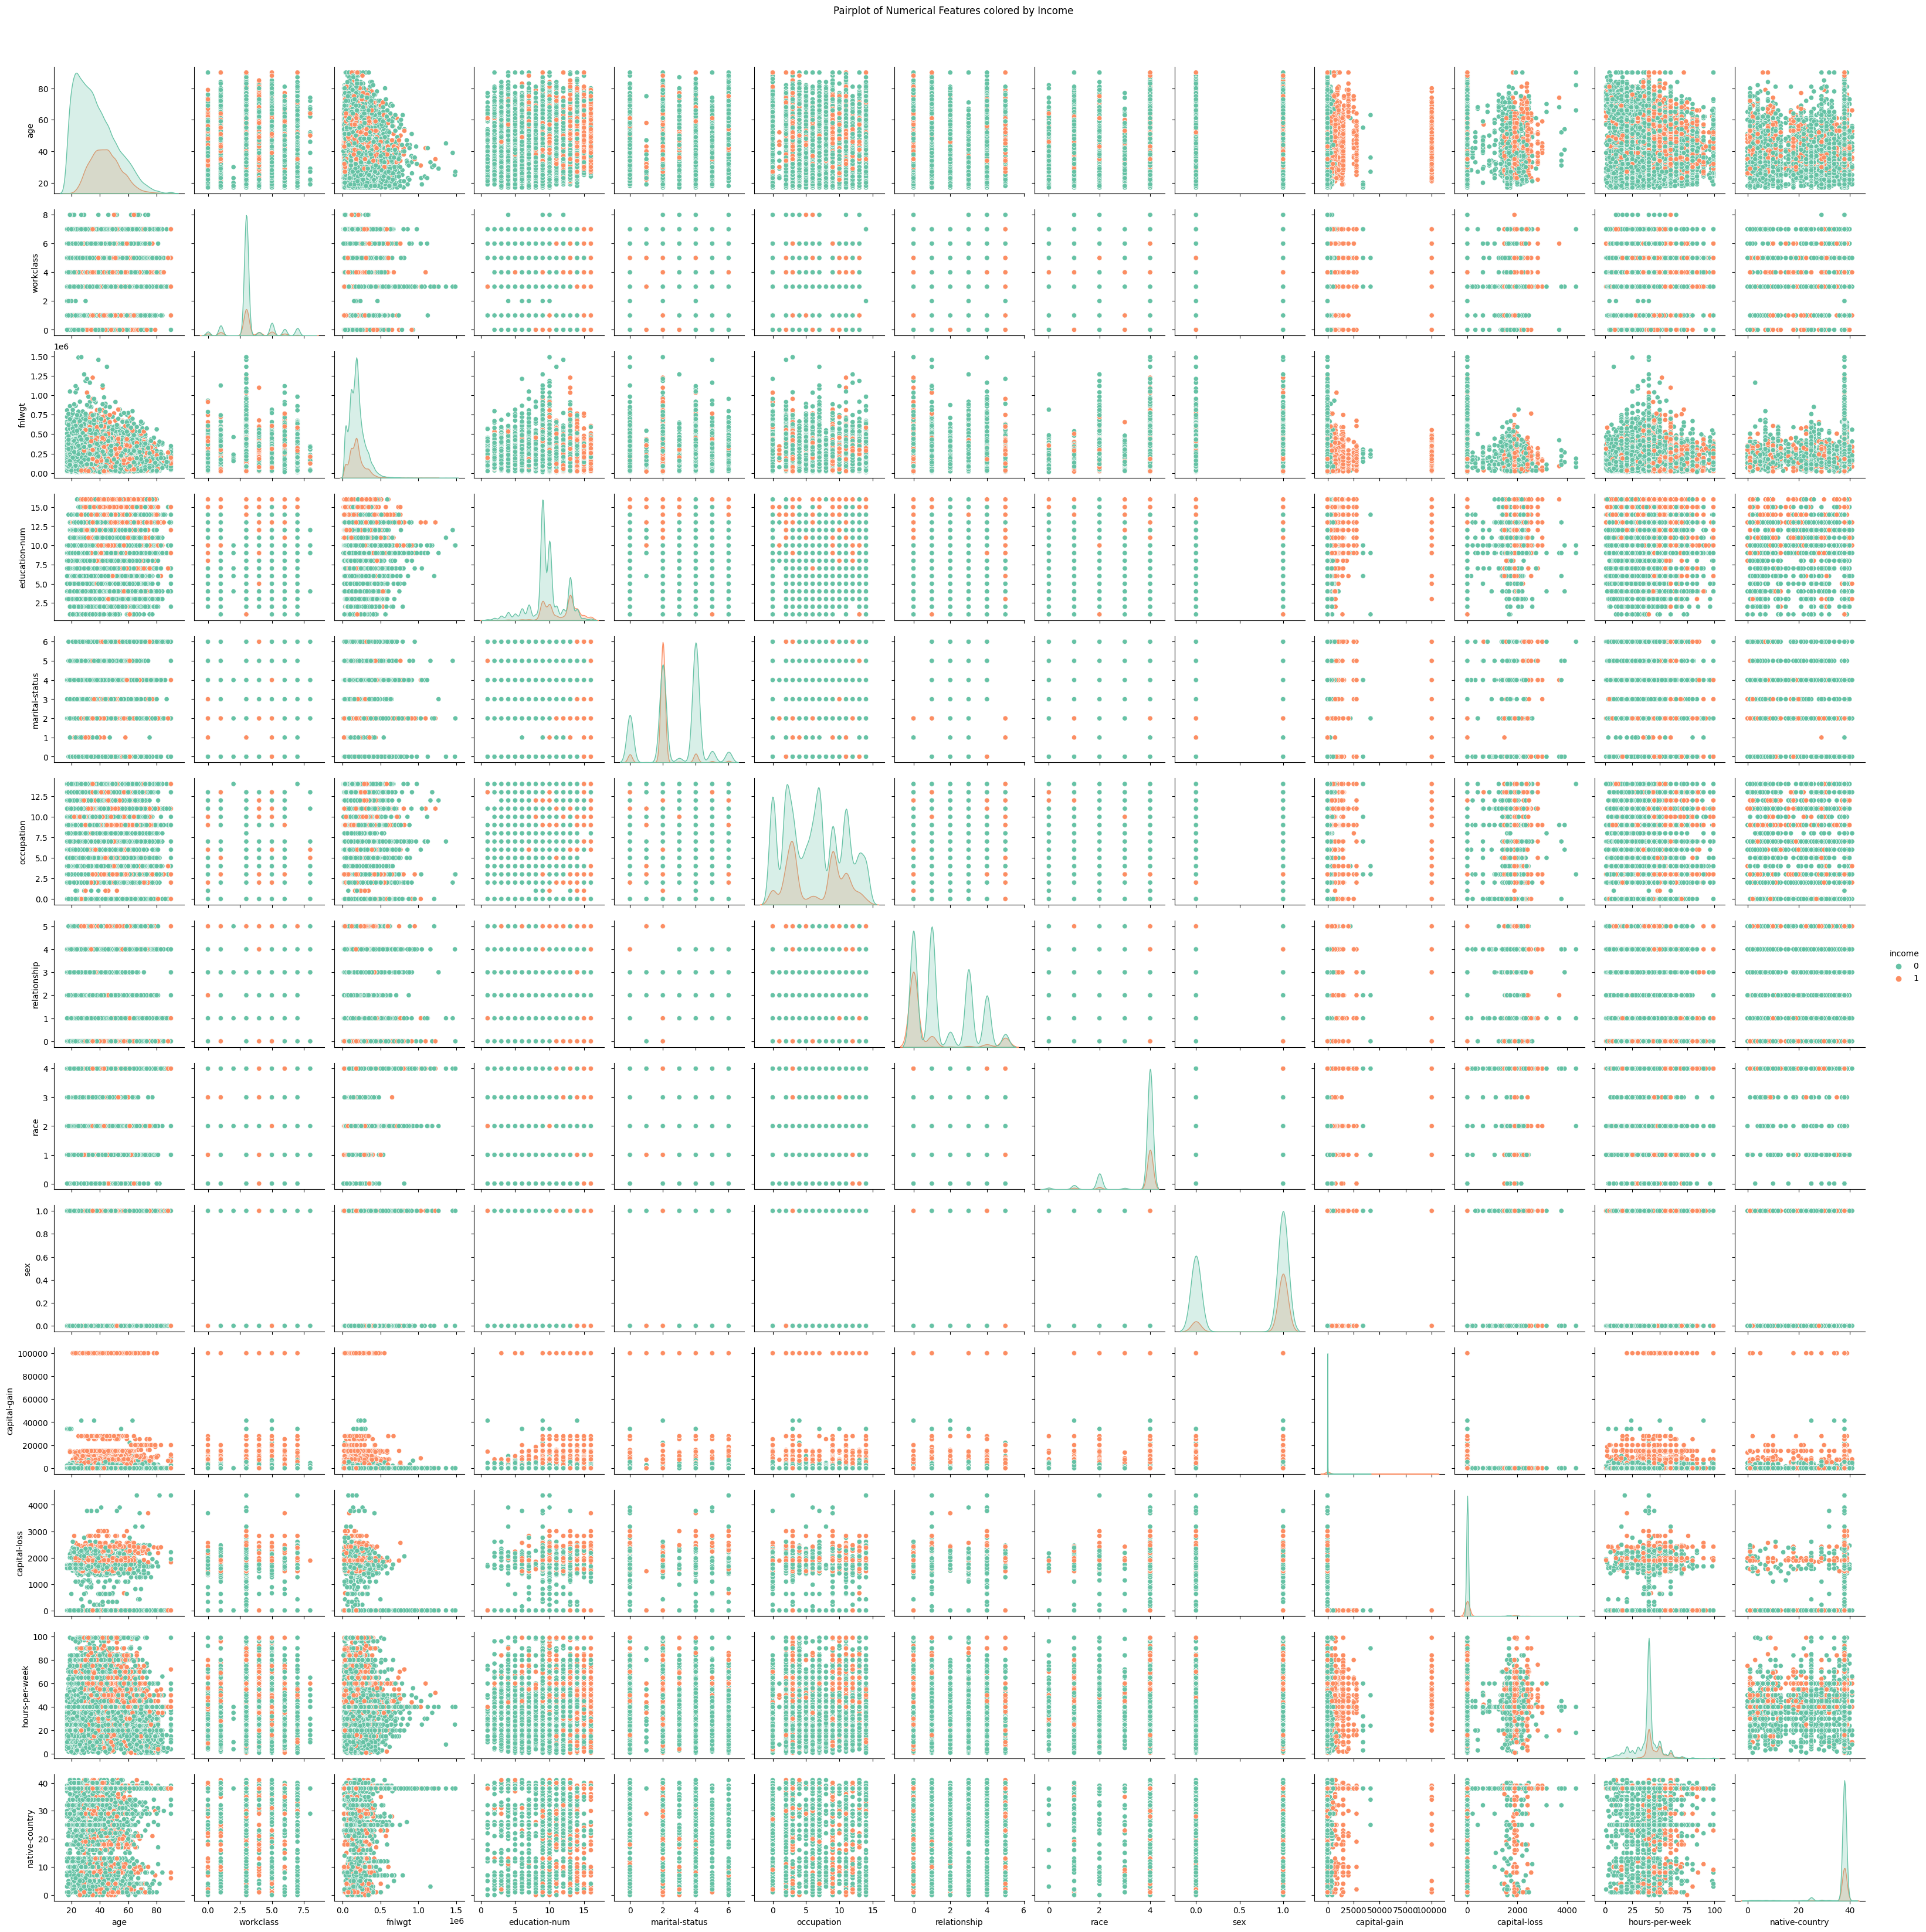

In [29]:
# Pairplot of numerical features colored by income
sns.pairplot(data, hue='income', palette='Set2')
plt.suptitle('Pairplot of Numerical Features colored by Income', y=1.02)
plt.show()


## Initial Model Training

In [30]:
X = data_ss.drop('income', axis=1)
y = data_ss['income']

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {}

#### Logistic regression

In [32]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_lr = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='binary')
recall_lr = recall_score(y_test, y_pred_lr, average='binary')
f1_lr = f1_score(y_test, y_pred_lr, average='binary')

print(f"Logistic Regression:- \nAccuracy: {accuracy_lr} | Precision: {precision_lr} | Recall: {recall_lr} | F1: {f1_lr}")

models["Logistic Regression"] = logistic_model

Logistic Regression:- 
Accuracy: 0.8216272965879265 | Precision: 0.7219215155615697 | Recall: 0.45307855626326965 | F1: 0.5567440647012785


#### Decision Tree

In [33]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions with Decision Tree
y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='binary')
recall_tree = recall_score(y_test, y_pred_tree, average='binary')
f1_tree = f1_score(y_test, y_pred_tree, average='binary')

print(f"Decision Tree:- \nAccuracy: {accuracy_tree}, Precision: {precision_tree}, Recall: {recall_tree}, F1: {f1_tree}")

models["Decision Tree"] = tree_model

Decision Tree:- 
Accuracy: 0.8030446194225722, Precision: 0.5998332638599416, Recall: 0.6110403397027601, F1: 0.6053849389987379


#### Random Forest

In [34]:
# Train the Random Forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)


# Predict on the test data
y_pred_forest = forest_model.predict(X_test)

# Evaluate Decision Tree model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='binary')
recall_forest = recall_score(y_test, y_pred_forest, average='binary')
f1_forest = f1_score(y_test, y_pred_forest, average='binary')

print(f"Random Forest:- \nAccuracy: {accuracy_forest} | Precision: {precision_forest} | Recall: {recall_forest} | F1: {f1_forest}")

models["Random Forest"] = forest_model

Random Forest:- 
Accuracy: 0.8541732283464567 | Precision: 0.7560975609756098 | Recall: 0.60552016985138 | F1: 0.6724829049752417


In [35]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

Logistic Regression:
Accuracy: train:  0.8238959741042994 | test:  0.8238592377758744
F1-score: train:  0.5571521301506914 | test:  0.5570308195204896
---------------------------------------------------------
Decision Tree:
Accuracy: train:  0.999910753576408 | test:  0.8119317607348642
F1-score: train:  0.9998158385233664 | test:  0.6169168021334993
---------------------------------------------------------
Random Forest:
Accuracy: train:  0.999832007218427 | test:  0.8561349396634116
F1-score: train:  0.9996533103088451 | test:  0.6774032156207777
---------------------------------------------------------


- As it appears from the exploration in our dataset that there is an imbalance between the classes of classifications. Since the individuals making more than 50k as income represent 75% of the data. So, we would try to make oversampling.

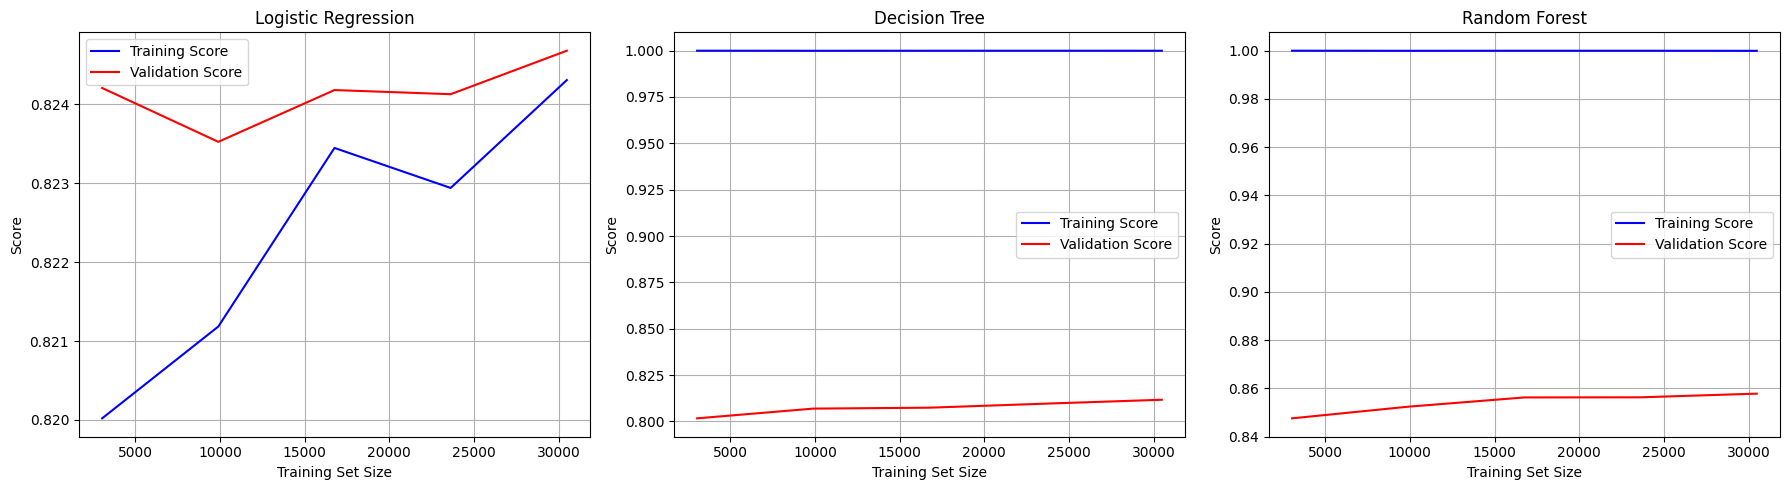

In [36]:
# Function to plot learning curves for bias-variance tradeoff in subplots
def plot_learning_curves(estimator, X_train, y_train, ax, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    
    # Calculate mean and std of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Plot learning curves
    ax.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
    ax.plot(train_sizes, test_scores_mean, label='Validation Score', color='red')
    ax.set_title(title)
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Score')
    ax.legend(loc='best')
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot learning curves for Logistic Regression
plot_learning_curves(logistic_model, X_train, y_train, axes[0], "Logistic Regression")

# Plot learning curves for Decision Tree
plot_learning_curves(tree_model, X_train, y_train, axes[1], "Decision Tree")

# Plot learning curves for Random Forest
plot_learning_curves(forest_model, X_train, y_train, axes[2], "Random Forest")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


1. Logistic Regression:
- Shows moderate performance with scores around 0.82-0.824
- Training score (blue) gradually improves with more data
- Validation score (red) shows some fluctuation but generally maintains a slight edge over the training score
- Appears to be slightly underfitting as the training score is lower than validation score

2. Decision Tree:

- Shows a significant gap between training and validation performance
- Training score (blue) is perfect (1.0) across all training set sizes
- Validation score (red) is much lower (~0.8-0.81)
- Clear signs of overfitting as the model performs perfectly on training data but poorly on validation data


3. Random Forest:

- Similar pattern to Decision Tree but with better validation performance
- Training score (blue) remains perfect (1.0)
- Validation score (red) is higher than Decision Tree (~0.85-0.86)
- Still shows overfitting, but less severe than the Decision Tree
- Slight improvement in validation score as training data increases

### Using Random Over Sampling

In [37]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Logistic Regression

In [38]:
# Train the Logistic Regression model
logistic_model_ros = LogisticRegression(max_iter=5000)
logistic_model_ros.fit(Xr_train, yr_train)

# Make predictions with Logistic Regression
yr_pred_lr = logistic_model_ros.predict(Xr_test)

# Evaluate Logistic Regression model
accuracy_lr1 = accuracy_score(yr_test, yr_pred_lr)
precision_lr1 = precision_score(yr_test, yr_pred_lr, average='binary')
recall_lr1 = recall_score(yr_test, yr_pred_lr, average='binary')
f1_lr1 = f1_score(yr_test, yr_pred_lr, average='binary')

print(f"Logistic Regression:- \nAccuracy: {accuracy_lr1}, Precision: {precision_lr1}, Recall: {recall_lr1}, F1: {f1_lr1}")

Logistic Regression:- 
Accuracy: 0.7687777161862528, Precision: 0.769666022633177, Recall: 0.7697722567287785, F1: 0.7697191360154579


#### Decision Tree

In [39]:
# Train the Decision Tree model
tree_model_ros = DecisionTreeClassifier(random_state=42)
tree_model_ros.fit(Xr_train, yr_train)

# Make predictions with Decision Tree
yr_pred_tree = tree_model_ros.predict(Xr_test)

# Evaluate Decision Tree model
accuracy_tree1 = accuracy_score(yr_test, yr_pred_tree)
precision_tree1 = precision_score(yr_test, yr_pred_tree, average='binary')
recall_tree1 = recall_score(yr_test, yr_pred_tree, average='binary')
f1_tree1 = f1_score(yr_test, yr_pred_tree, average='binary')

print(f"Decision Tree:- \nAccuracy: {accuracy_tree1}, Precision: {precision_tree1}, Recall: {recall_tree1}, F1: {f1_tree1}")

Decision Tree:- 
Accuracy: 0.9165049889135255, Precision: 0.8760896637608966, Recall: 0.9710144927536232, F1: 0.9211129296235678


#### Random Forest

In [40]:
# Train the Random Forest model
forest_model_ros = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model_ros.fit(Xr_train, yr_train)


# Predict on the test data
yr_pred_forest = forest_model_ros.predict(Xr_test)

# Evaluate Decision Tree model
accuracy_forest1 = accuracy_score(yr_test, yr_pred_forest)
precision_forest1 = precision_score(yr_test, yr_pred_forest, average='binary')
recall_forest1 = recall_score(yr_test, yr_pred_forest, average='binary')
f1_forest1 = f1_score(yr_test, yr_pred_forest, average='binary')

print(f"Random Forest:- \nAccuracy: {accuracy_forest1} | Precision: {precision_forest1} | Recall: {recall_forest1} | F1: {f1_forest1}")

Random Forest:- 
Accuracy: 0.9336890243902439 | Precision: 0.9 | Recall: 0.9763975155279503 | F1: 0.9366434955312809


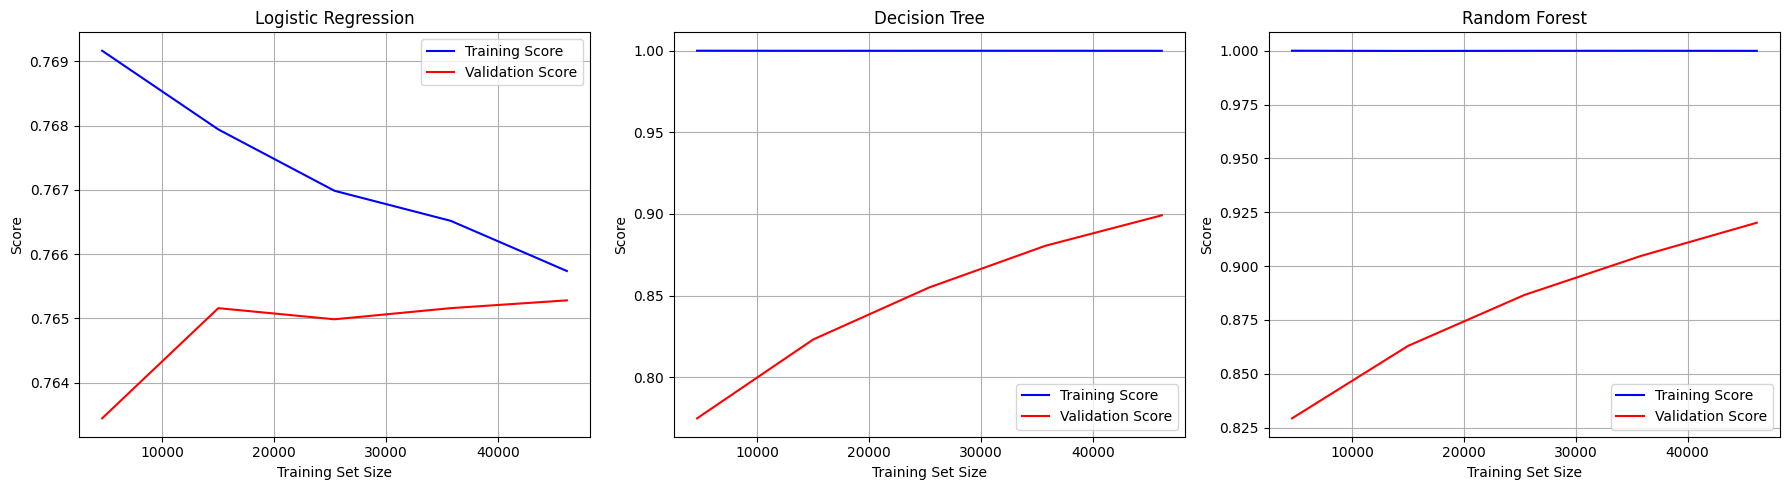

In [41]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot learning curves for Logistic Regression
plot_learning_curves(logistic_model_ros, Xr_train, yr_train, axes[0], "Logistic Regression")

# Plot learning curves for Decision Tree
plot_learning_curves(tree_model_ros, Xr_train, yr_train, axes[1], "Decision Tree")

# Plot learning curves for Random Forest
plot_learning_curves(forest_model_ros, Xr_train, yr_train, axes[2], "Random Forest")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

1. Logistic Regression:
- Training score (blue) steadily decreases as training set size increases (from ~0.769 to ~0.766)
- Validation score (red) initially increases and then plateaus around 0.765
- The curves converge as training size increases, suggesting good generalization
- Shows signs of high bias (underfitting) as both scores are relatively low

2. Decision Tree:
- Training score (blue) remains perfect at 1.0 across all training sizes
- Validation score (red) shows steady improvement from ~0.77 to ~0.90
- Large gap between training and validation scores indicates overfitting
- However, validation performance continues to improve with more data
- Could potentially benefit from further increasing training data

3. Random Forest:
- Training score (blue) stays at 1.0, similar to Decision Tree
- Validation score (red) shows consistent improvement from ~0.83 to ~0.92
- Better validation performance than both Decision Tree and Logistic Regression
- Still shows overfitting but with better generalization than Decision Tree
- Validation score hasn't plateaued, suggesting potential benefit from more training data

Comparative Analysis:
- Random Forest shows the best overall performance
- Decision Tree and Random Forest both suffer from overfitting but show promising validation improvements
- Logistic Regression shows underfitting, suggesting it might be too simple for this problem
- More training data appears beneficial for tree-based models but doesn't help Logistic Regression much
- The learning curves suggest tree-based models (especially Random Forest) are more suitable for this particular problem

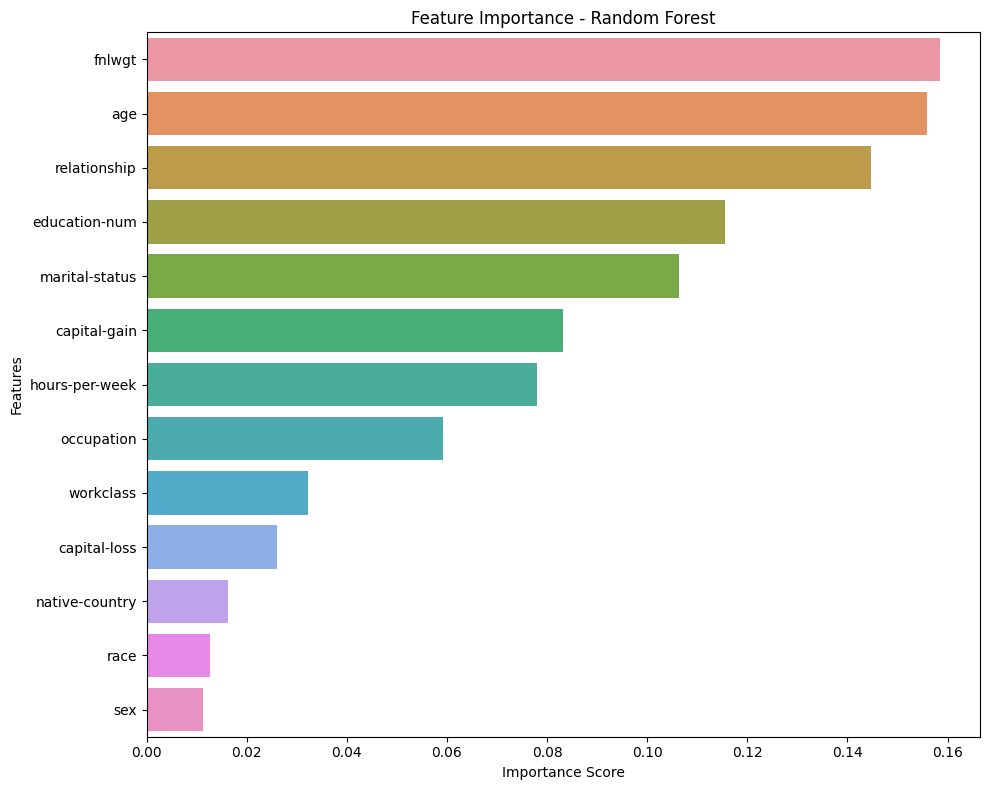

In [42]:
# Get feature importances from the trained Random Forest model
feature_importances = forest_model_ros.feature_importances_

# Create a DataFrame for better visualization (assuming Xr_train has the feature names)
feature_names = Xr_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


- Since we have highest accuracy on Random Forest, here is a visual representation for feature importance.

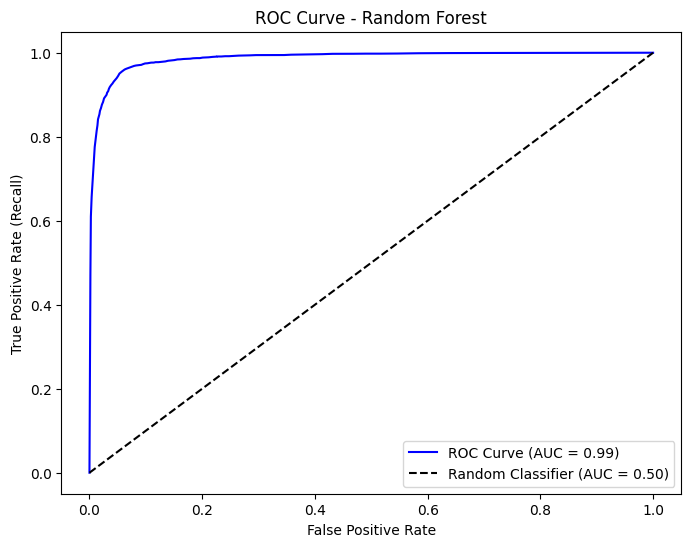

In [43]:
# Get predicted probabilities
y_proba_forest = forest_model_ros.predict_proba(Xr_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(yr_test, y_proba_forest)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(yr_test, y_proba_forest):.2f})", color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.show()
